In [30]:
import numpy as np 
import pandas as pd 

In [31]:
df=pd.read_csv("spam.csv",encoding="latin1")

In [32]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [33]:
df.shape

(5572, 5)

In [34]:
#1.Data cleaning
#2.Exploratory Data Analysis
#3.Prepocessing
#4.Model building
#5.Evaluation
#6.Improvements

Data Cleaning

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [36]:
#removing unnecessary coloums
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True);
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [38]:
#encoding target
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [39]:
df["target"]=encoder.fit_transform(df["target"])
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
#checking for values
df.isnull().sum()

target    0
text      0
dtype: int64

In [41]:
#check for duplicate values
df.duplicated().sum()

403

In [42]:
#remove duplicates
df=df.drop_duplicates(keep="first")

df.duplicated().sum()

0

In [43]:
df.shape

(5169, 2)

2.EDA

In [44]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

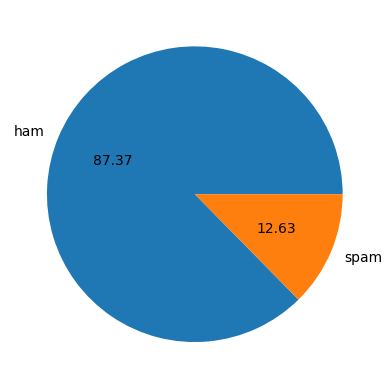

In [45]:
import matplotlib.pyplot as plt 
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [46]:
#Data is imbalanced

In [47]:
#importing natural language processing library
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ramch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
#adding no.of characters extra column
df["num_characters"]=df["text"].apply(len)
df.head(5)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [49]:
#adding extra column for no.of words
df["num_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [50]:
#adding extra column for no.of sentences
df["num_sentences"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [51]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [52]:
#for ham messages
df[df["target"] == 0][["num_characters", "num_words", "num_sentences"]].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [53]:
#for spam messages
df[df["target"] == 1][["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [54]:
#histograms for analysing the features
import seaborn as sns 

<Axes: xlabel='num_characters', ylabel='Count'>

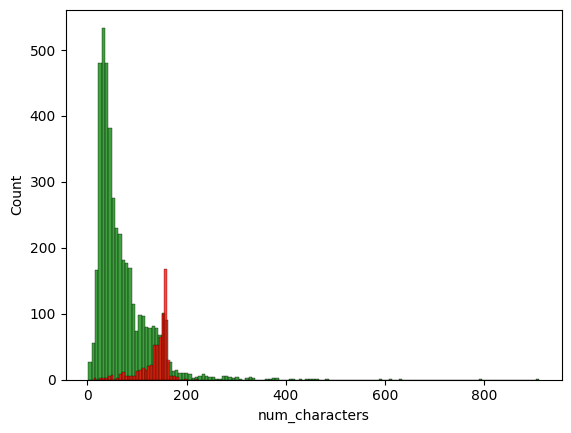

In [55]:
sns.histplot(df[df["target"]==0]["num_characters"],color="green")
sns.histplot(df[df["target"]==1]["num_characters"],color="red")

<Axes: xlabel='num_words', ylabel='Count'>

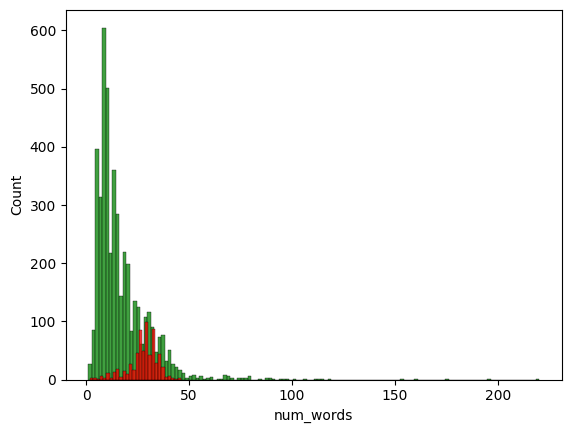

In [56]:
sns.histplot(df[df["target"]==0]["num_words"],color="green")
sns.histplot(df[df["target"]==1]["num_words"],color="red")

c:\Users\ramch\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


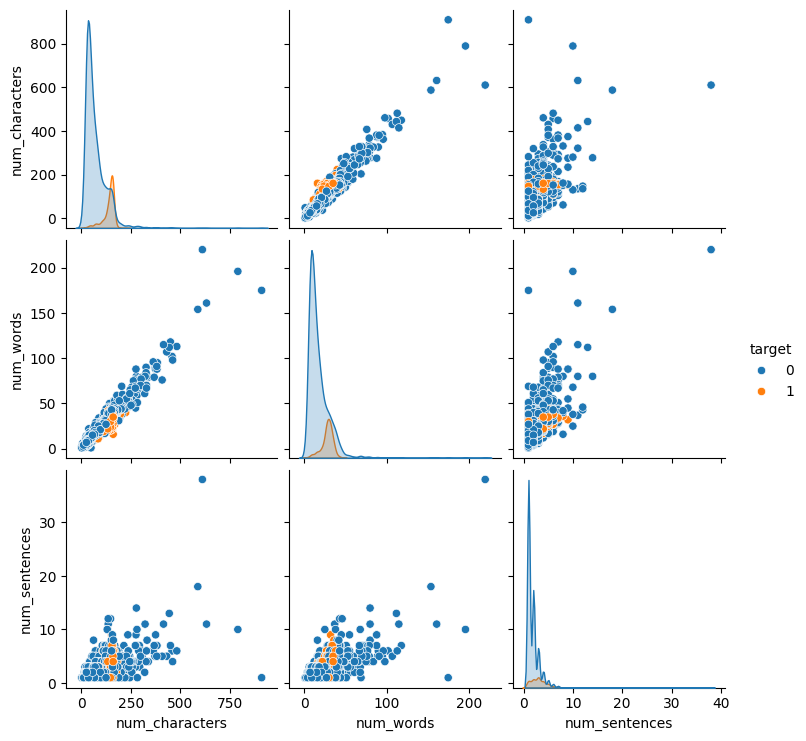

In [57]:
#how features depend on other features
sns.pairplot(df,hue="target")

In [58]:
#we can see outliers which distrub the model

In [59]:
#correlation between each features
df[["target","num_characters","num_words","num_sentences"]].corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

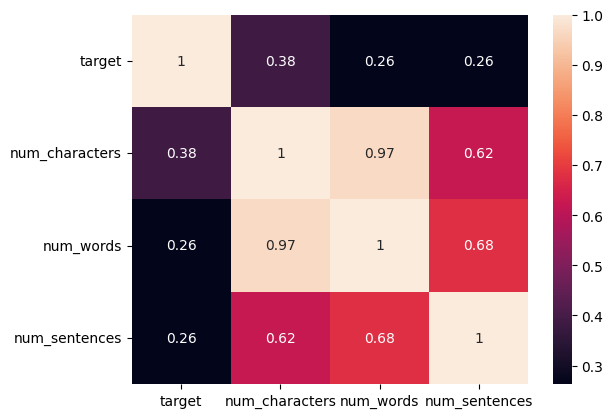

In [60]:
sns.heatmap(df[["target","num_characters","num_words","num_sentences"]].corr(),annot=True)

In [61]:
#as there is strong correlation between the three we only keep one column

Data Preprocessing

In [62]:
#lower case
#tokenization
#removing special characters
#removing stop words and punctuatuions
#stemming

In [63]:
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [64]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [65]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [66]:
def transform_text(text):
    text=text.lower()

    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y.copy()
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    
    text=y.copy()
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [67]:
transform_text(df["text"][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [68]:
df["transformed_text"]=df["text"].apply(transform_text)

In [69]:
from wordcloud import WordCloud
wc=WordCloud(width=1000,height=1000,min_font_size=10,background_color="white")

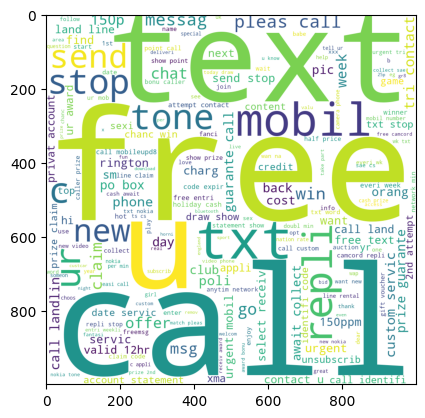

In [70]:
#more frequently used words for spam messages
spam_wc=wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))
plt.imshow(spam_wc)

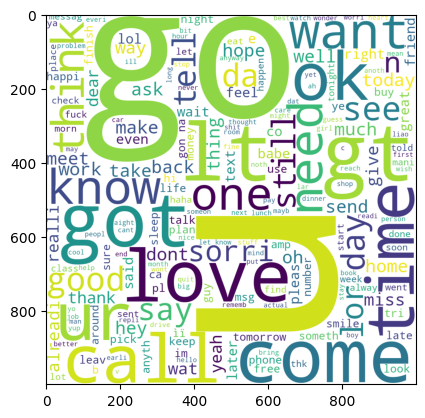

In [71]:
#more frequently used words for ham messages
ham_wc=wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))
plt.imshow(ham_wc)

In [72]:
spam_corpus=[]
for msg in df[df["target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [73]:
len(spam_corpus)

9939

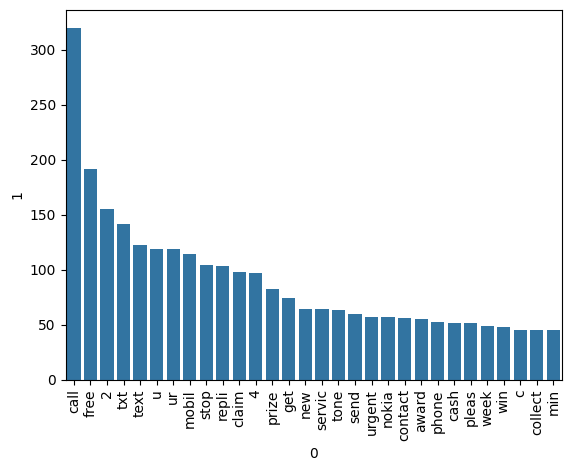

In [74]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

In [75]:
ham_corpus=[]
for msg in df[df["target"]==0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [76]:
len(ham_corpus)

35404

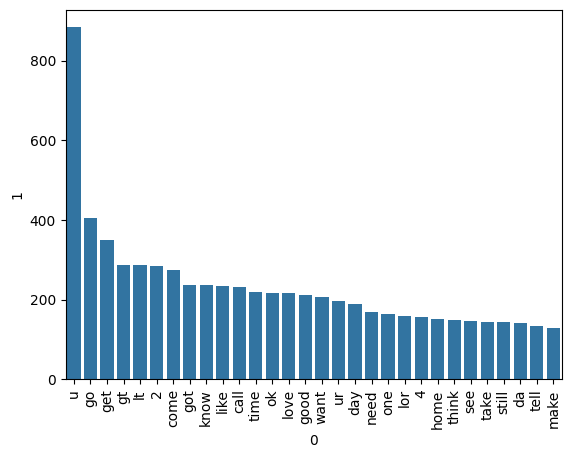

In [77]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

4.Model Building

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [79]:
X=cv.fit_transform(df["transformed_text"]).toarray()

In [80]:
X.shape

(5169, 6708)

In [81]:
y=df["target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [84]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [85]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))


0.8800773694390716
0.5315315315315315
[[792 104]
 [ 20 118]]


In [86]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9642166344294004
0.8344370860927153
[[871  25]
 [ 12 126]]


In [87]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9700193423597679
0.9734513274336283
[[893   3]
 [ 28 110]]


In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [89]:
X=tfidf.fit_transform(df["transformed_text"]).toarray()

In [90]:
X.shape

(5169, 6708)

In [91]:
#without using scaler

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)


In [93]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.8762088974854932
0.5231481481481481
[[793 103]
 [ 25 113]]


In [94]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9593810444874274
1.0
[[896   0]
 [ 42  96]]


In [95]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9700193423597679
0.9734513274336283
[[893   3]
 [ 28 110]]


In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 

In [99]:
lrc=LogisticRegression(penalty="l2")
dtc=DecisionTreeClassifier(max_depth=5)
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [100]:
clfs= {
    "LR":lrc,
    "DT":dtc,
    "RF":rfc,
    "XGB":xgb,
}

In [101]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    return accuracy,precision

In [102]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy = ",current_accuracy)
    print("Precision = ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  LR
Accuracy =  0.9468085106382979
Precision =  0.9882352941176471
For  DT
Accuracy =  0.9352030947775629
Precision =  0.8380952380952381
For  RF
Accuracy =  0.971953578336557
Precision =  1.0
For  XGB
Accuracy =  0.9729206963249516
Precision =  0.9435483870967742


In [103]:
#using minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [104]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [105]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))


0.8762088974854932
0.5217391304347826
[[786 110]
 [ 18 120]]


In [106]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9690522243713733
0.863013698630137
[[876  20]
 [ 12 126]]


In [107]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9700193423597679
0.9734513274336283
[[893   3]
 [ 28 110]]


In [108]:
clfs= {
    "LR":lrc,
    "DT":dtc,
    "RF":rfc,
    "XGB":xgb,
}

In [109]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy = ",current_accuracy)
    print("Precision = ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  LR
Accuracy =  0.965183752417795
Precision =  0.9903846153846154
For  DT
Accuracy =  0.9361702127659575
Precision =  0.8461538461538461
For  RF
Accuracy =  0.971953578336557
Precision =  1.0
For  XGB
Accuracy =  0.9729206963249516
Precision =  0.9435483870967742


In [110]:
#here we can see random forest has higher precision and accuracy values
#but random forest gives some randomness in results

In [111]:
#using Standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [127]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [128]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.8858800773694391
0.5442477876106194
[[793 103]
 [ 15 123]]


In [ ]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9700193423597679
0.9734513274336283
[[893   3]
 [ 28 110]]


In [ ]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy = ",current_accuracy)
    print("Precision = ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  LR
Accuracy =  0.965183752417795
Precision =  0.9903846153846154
For  DT
Accuracy =  0.9361702127659575
Precision =  0.8461538461538461
For  RF
Accuracy =  0.971953578336557
Precision =  1.0
For  XGB
Accuracy =  0.9729206963249516
Precision =  0.9435483870967742


In [135]:
#appending a new feature
X=np.hstack((X,df["num_characters"].values.reshape(-1,1)))

In [136]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [137]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy = ",current_accuracy)
    print("Precision = ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  LR
Accuracy =  0.9700193423597679
Precision =  0.9908256880733946
For  DT
Accuracy =  0.9526112185686654
Precision =  0.8938053097345132
For  RF
Accuracy =  0.971953578336557
Precision =  1.0
For  XGB
Accuracy =  0.9680851063829787
Precision =  0.9338842975206612


In [ ]:
#adding this feature doesn't increase precision so we don't use it
#RF with maxmin scaler is good